In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv('glass.csv')
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [4]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


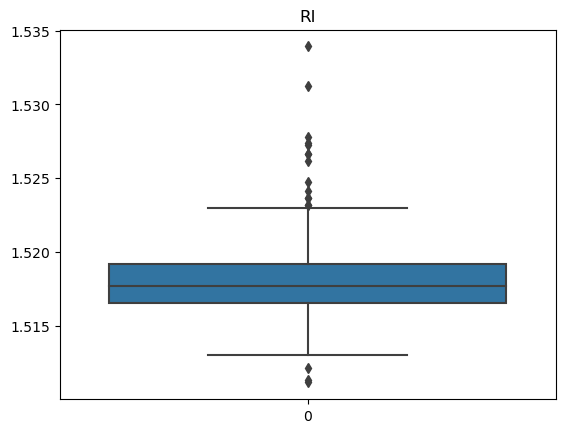

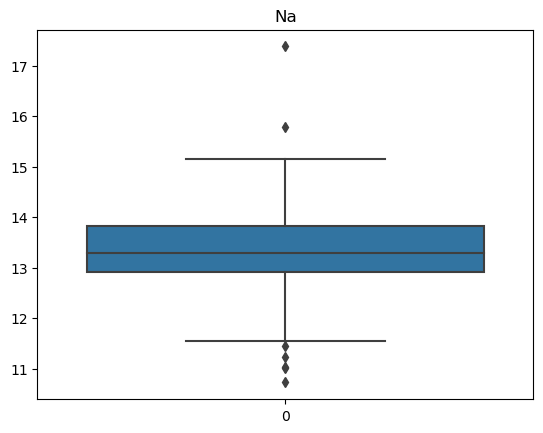

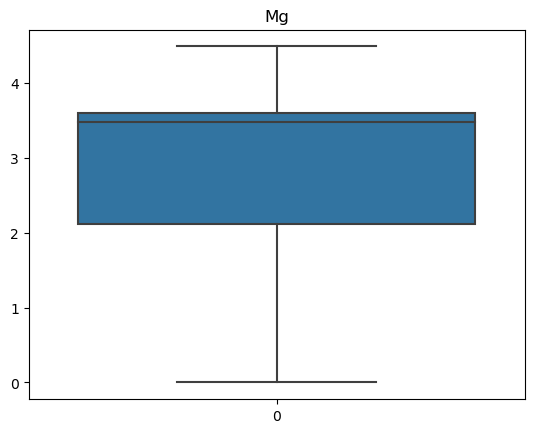

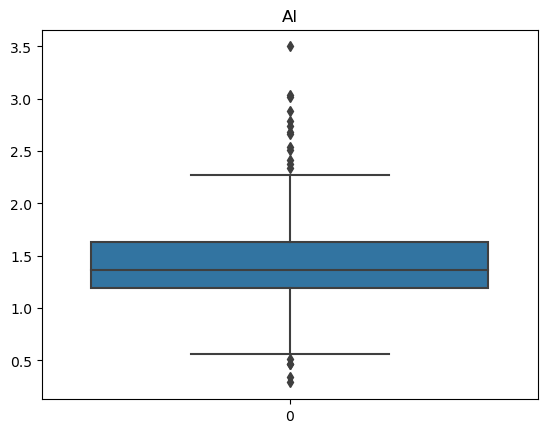

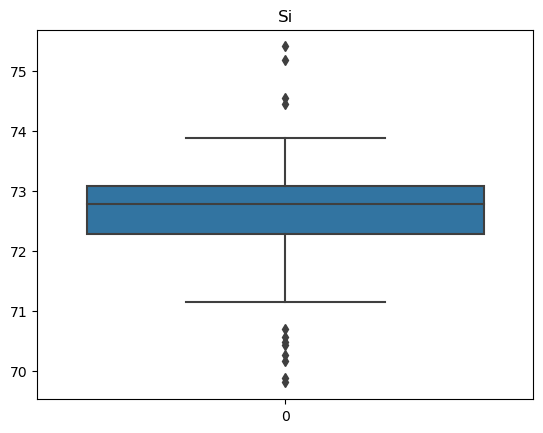

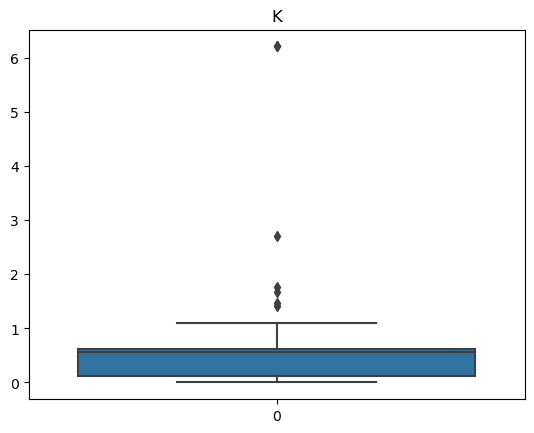

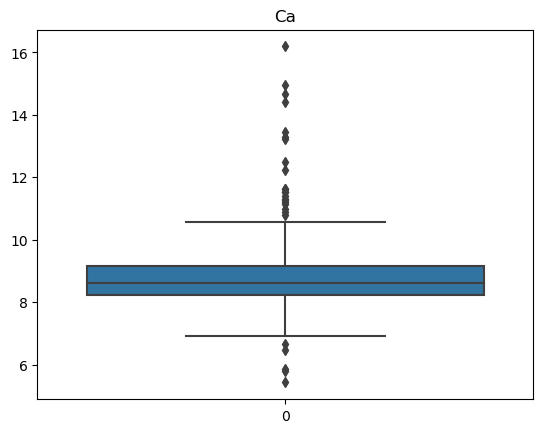

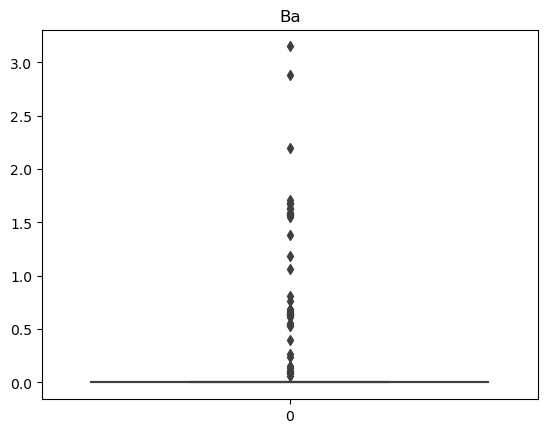

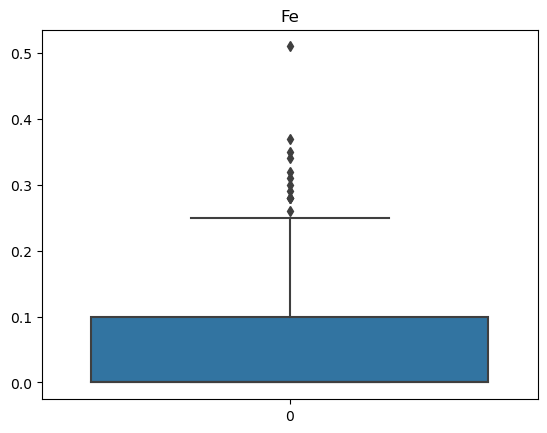

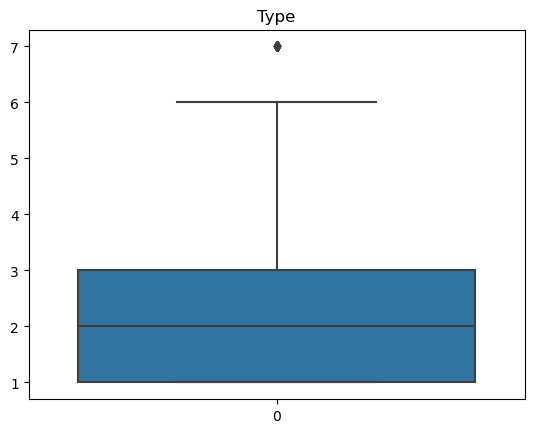

In [5]:
for i in data.columns:
    sns.boxplot(data[i])
    plt.title(i)
    plt.show()

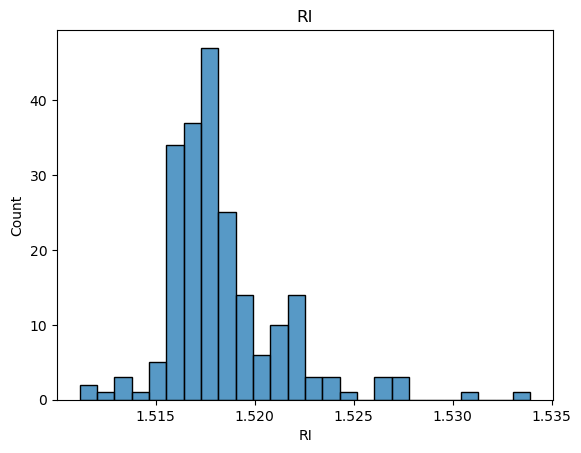

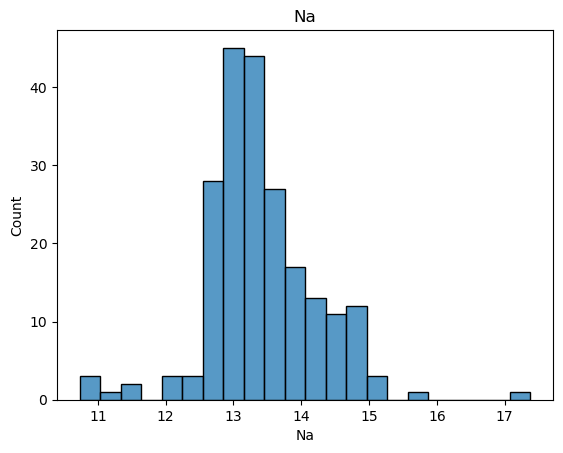

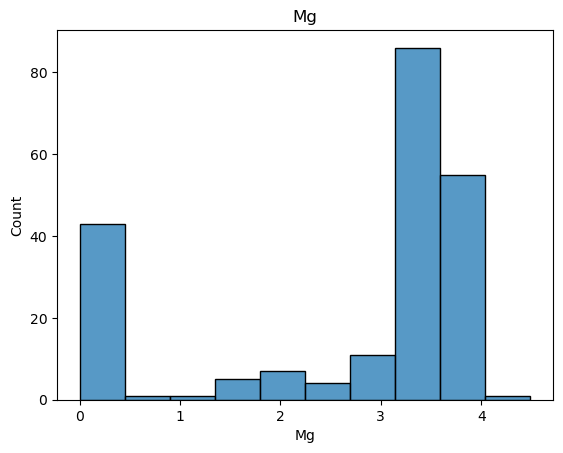

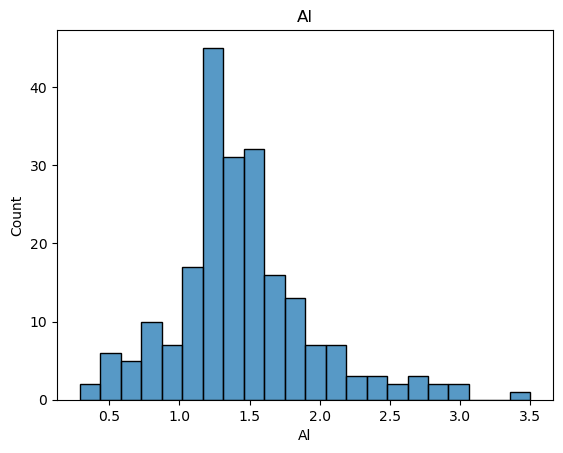

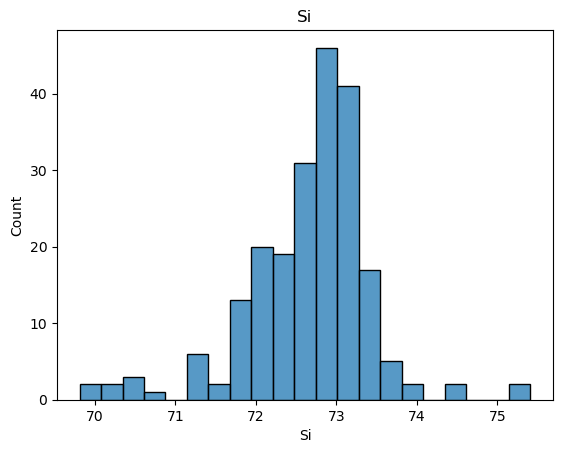

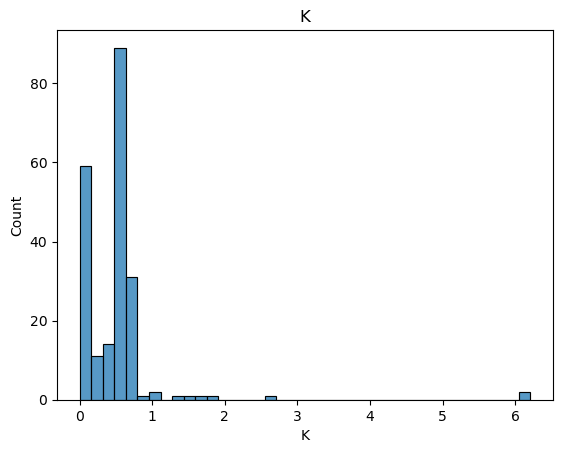

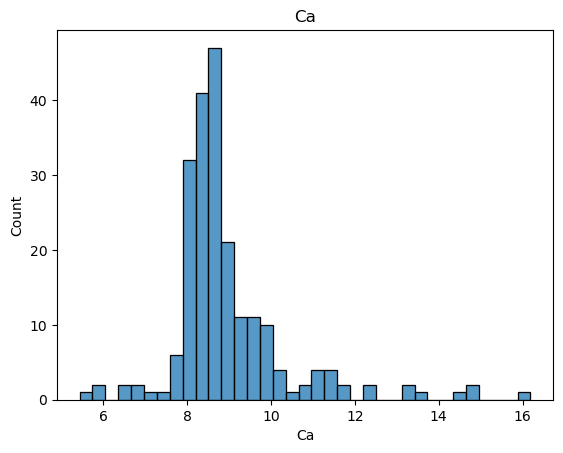

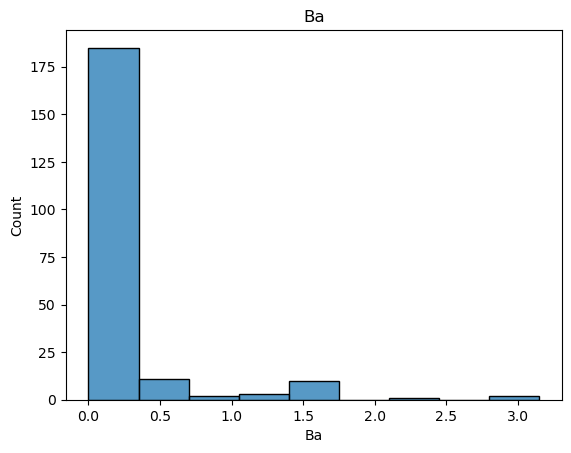

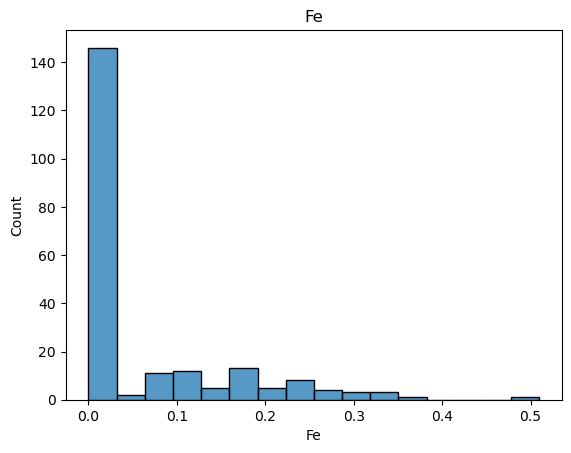

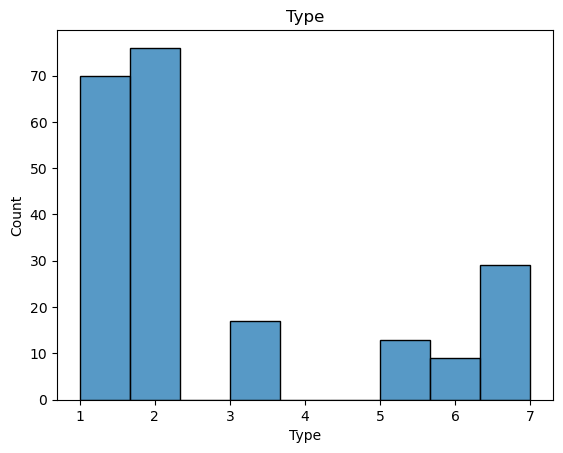

In [6]:
for i in data.columns:
    sns.histplot(data[i])
    plt.title(i)
    plt.show()

In [7]:
X = data.drop(labels= "Type" , axis = 1)
y = data["Type"]


In [8]:
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [9]:
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [12]:
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )

In [13]:
NNH.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [14]:
from sklearn.metrics import accuracy_score

In [15]:
predicted_train_labels = NNH.predict(X_train)
accuracy_score(y_train,predicted_train_labels)

1.0

In [16]:
predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.7384615384615385

In [17]:
accuracy_score(y_test,predicted_labels)

0.7384615384615385

In [18]:
scores =[]
for k in range(1,15):
    NNH = KNeighborsClassifier(n_neighbors = k, weights = 'distance' )
    NNH.fit(X_train, y_train)
    scores.append(NNH.score(X_test, y_test))

In [19]:
scores

[0.7692307692307693,
 0.7692307692307693,
 0.7076923076923077,
 0.7076923076923077,
 0.7384615384615385,
 0.7076923076923077,
 0.7384615384615385,
 0.6923076923076923,
 0.7230769230769231,
 0.7076923076923077,
 0.7076923076923077,
 0.7230769230769231,
 0.6923076923076923,
 0.6923076923076923]

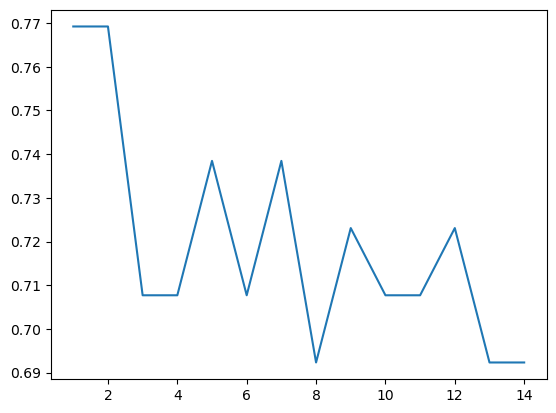

In [20]:
plt.plot(range(1,15),scores)

In [21]:
scores =[]
for k in range(1,15):
    NNH1 = KNeighborsClassifier(n_neighbors = k, weights = 'uniform' )
    NNH1.fit(X_train, y_train)
    scores.append(NNH1.score(X_test, y_test))

In [22]:
scores

[0.7692307692307693,
 0.7230769230769231,
 0.7230769230769231,
 0.7384615384615385,
 0.7384615384615385,
 0.7384615384615385,
 0.7384615384615385,
 0.6923076923076923,
 0.7230769230769231,
 0.6923076923076923,
 0.7076923076923077,
 0.7384615384615385,
 0.7076923076923077,
 0.6923076923076923]

In [23]:
knn_clf = KNeighborsClassifier()
knn_model = knn_clf.fit(X_train, y_train)
knn_prediction = knn_clf.predict(X_test)
knn_train_pred = knn_clf.predict(X_train)

print("Accuracy {0:.2f}%".format(100*accuracy_score(knn_train_pred, y_train)))
print("Accuracy {0:.2f}%".format(100*accuracy_score(knn_prediction, y_test)))

# Display the Confusion Matrix and Classification Report 
print(confusion_matrix(knn_prediction, y_test))
print(classification_report(knn_prediction, y_test))

Accuracy 72.48%
Accuracy 73.85%
[[22  3  6  0  0  1]
 [ 3 15  1  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0  2  0  2  0  0]
 [ 0  1  0  0  1  0]
 [ 0  0  0  0  0  8]]
              precision    recall  f1-score   support

           1       0.88      0.69      0.77        32
           2       0.71      0.79      0.75        19
           3       0.00      0.00      0.00         0
           5       1.00      0.50      0.67         4
           6       1.00      0.50      0.67         2
           7       0.89      1.00      0.94         8

    accuracy                           0.74        65
   macro avg       0.75      0.58      0.63        65
weighted avg       0.84      0.74      0.78        65



C:\Users\sushm\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sushm\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sushm\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
